# Тестовое задание
### SQL
> Есть таблица с данными по балансу на счете пользователя за каждый день.<br>
Записи уникальны по ключу user_id + date<br><br>
<table align="left">
  <tr>
    <th>столбец</th>
    <th>тип данных</th>
    <th>описание</th>
  </tr>
  <tr>
    <td>user_id</td>
    <td>varchar</td>
    <td>ID пользователя</td>
  </tr>
  <tr>
    <td>date</td>
    <td>date</td>
    <td>Дата</td>
  </tr>
  <tr>
    <td>balance</td>
    <td>int</td>
    <td>Баланс в рублях</td>
  </tr>
</table><br><br><br><br><br><br>

#### Дано:
> Параметры **date_min** и **date_max**.

#### Задача:
> Для каждого пользователя найти все диапазоны между **date_min** и
**date_max** включительно, где баланс был непрерывно больше нуля. Вывести длину
диапазона и средний баланс для каждого диапазона.<br>
Пример: **date_min** = 01.05.2019; **date_max** = 05.05.2019<br><br>

<table align="left">
  <tr>
    <th>user_id</th>
    <th>date</th>
    <th>balance</th>
  </tr>
  <tr>
    <td>abc001</td>
    <td>01.05.2019</td>
    <td>0</td>
  </tr>
  <tr>
    <td>abc001</td>
    <td>02.05.2019</td>
    <td>100</td>
  </tr>
  <tr>
    <td>abc001</td>
    <td>03.05.2019</td>
    <td>50</td>
  </tr><tr>
    <td>abc001</td>
    <td>04.05.2019</td>
    <td>30</td>
  </tr><tr>
    <td>abc001</td>
    <td>05.05.2019</td>
    <td>0</td>
  </tr><tr>
    
  <tr>
    <td>abc002</td>
    <td>01.05.2019</td>
    <td>100</td>
  </tr>
  <tr>
    <td>abc002</td>
    <td>02.05.2019</td>
    <td>50</td>
  </tr>
  <tr>
    <td>abc002</td>
    <td>03.05.2019</td>
    <td>0</td>
  </tr><tr>
    <td>abc002</td>
    <td>04.05.2019</td>
    <td>0</td>
  </tr><tr>
    <td>abc002</td>
    <td>05.05.2019</td>
    <td>200</td>
  </tr><tr>
</table><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
В качестве ответа ожидаем SQL-запрос, который будет возвращать таблицу периодов:<br>
user_id,<br>
date_start,<br>
date_end,<br>
length,<br>
balance_avg<br>

### Решение:

In [1]:
q_table = '''
create table user_balance_story (
    user_id varchar(6),
    date date,
    balance int
);

insert into user_balance_story values
('abc001', '2019-05-01', 0),
('abc001', '2019-05-02', 100),
('abc001', '2019-05-03', 50),
('abc001', '2019-05-04', 30),
('abc001', '2019-05-05', 0),

('abc002', '2019-05-01', 100),
('abc002', '2019-05-02', 50),
('abc002', '2019-05-03', 0),
('abc002', '2019-05-04', 0),
('abc002', '2019-05-05', 200);
'''

q_query = '''
with step1 as
    (
    select
        user_id,
        date,
        balance,

        --Баланс больше 0?
        case
            when balance > 0 then 1
            else 0
        end as grp1
    from user_balance_story
    ),
    
    step2 as
    (
    select
        user_id,
        date,
        balance,

        grp1,

        row_number() over(partition by user_id order by date) as rn1,
        row_number() over(partition by user_id, grp1 order by date) as rn2,

        (row_number() over(partition by user_id order by date) - row_number() over(partition by user_id, grp1 order by date) + 1) as rn3
    from step1
    ),
    
    step3 as
    (
    select
        user_id,
        date,
        balance,

        grp1,

        rn1,
        rn2,

        case
            when grp1 = 0 then 0
            else rn3
        end as rn3
    from step2
    )
select
    user_id,
    rn3,
    
    min(date) as date_start,
    max(date) as date_end,
    
    count(distinct date) as length_,
    
    avg(balance) as balance_avg
from step3
where rn3 <> 0
group by 1, 2
'''

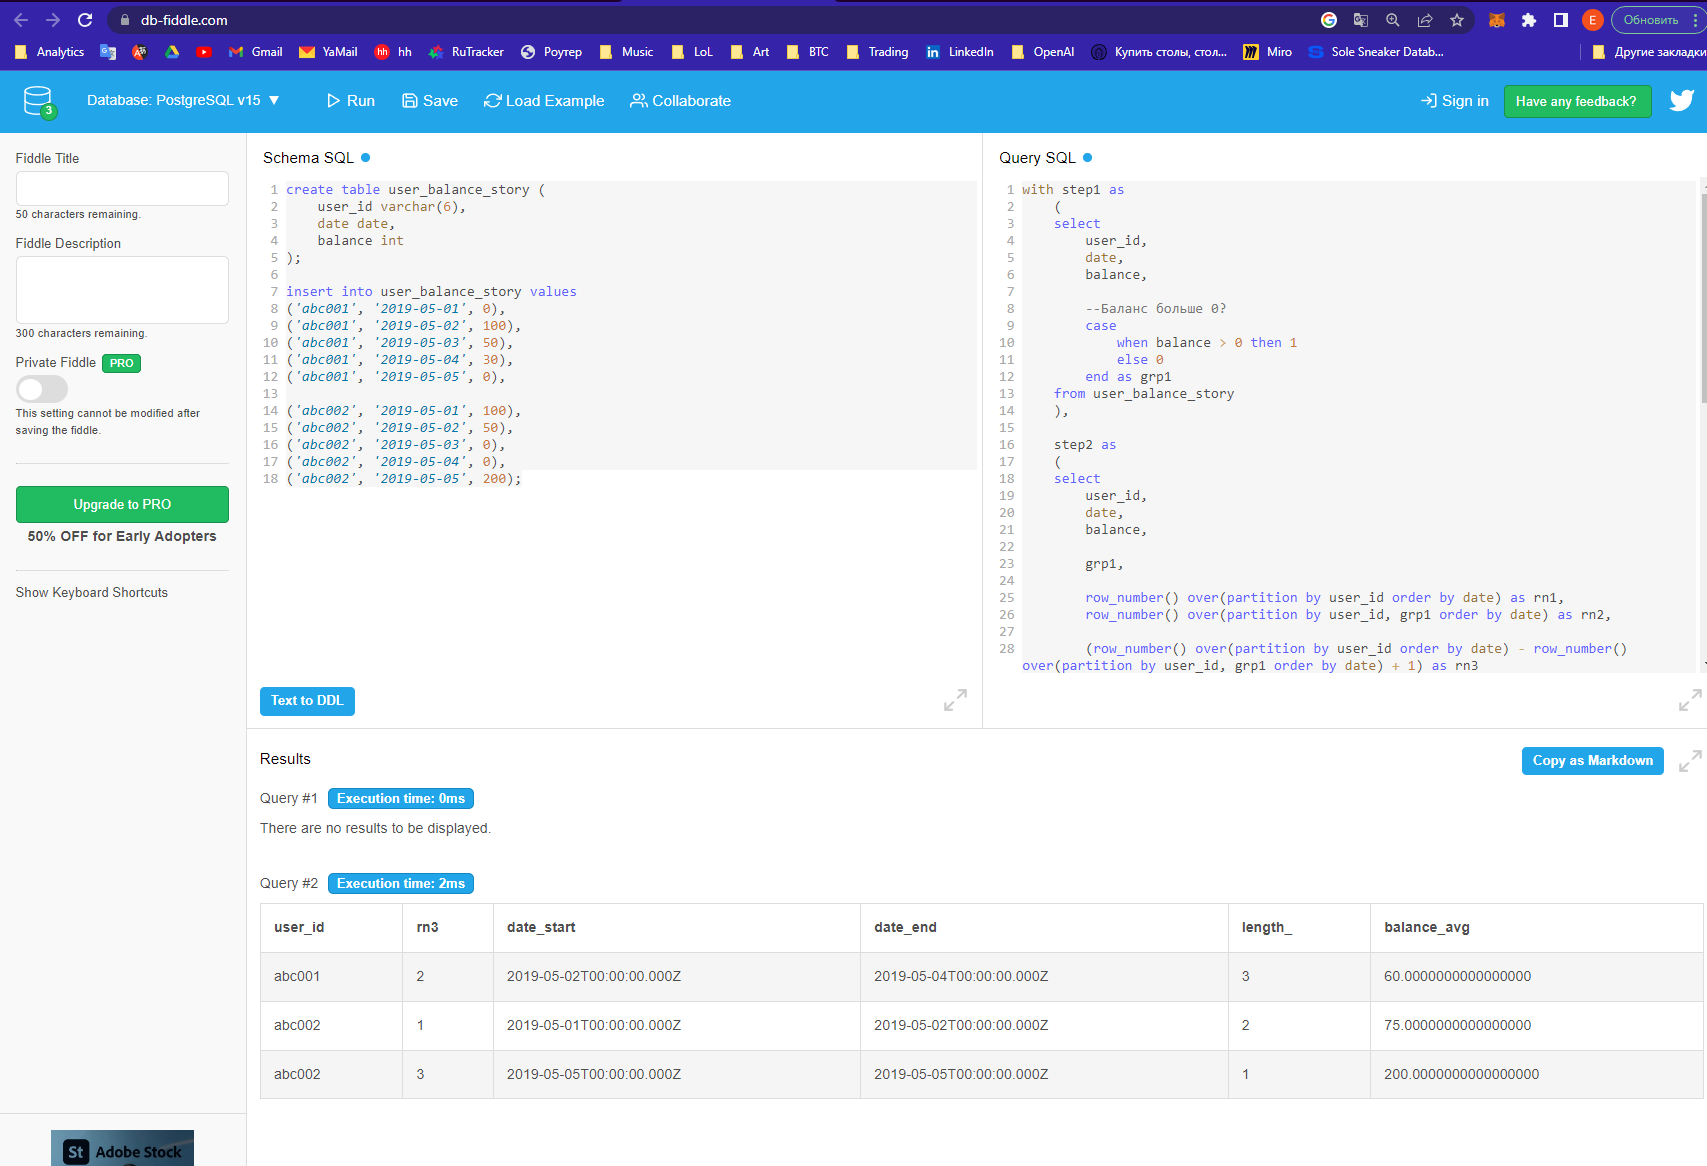

### Кейс

К вам обратился продакт-менеджер more.tv<br><br>
Руководство и другие сотрудники нередко указывают на некорректную работу
поиска в приложении<br><br>
Продакт-менеджер сомневается, стоит ли заниматься задачей, и просит вашей
помощи:
<ol>
<li>Как бы вы определили качество поиска?</li>
<li>Какую метрику считаете ведущей?</li>
<li>Как вы думаете, на основании чего продакт-менеджеру стоит принять решение</li>
заниматься задачей или нет?
    </ol>

### Решение:
Наверняка у сомневающегося продакта есть причины сомнений. Это значит, что у него есть гипотеза или, как минимум, негативные кейсы, которые он мог бы показать мне, чтобы мы подумали вместе тривиальна ли задача, которую он хочет решить или нет.<br><br>
За поиском в интернет-поисковике стоит одна из классическиз ML-задач - задача ранжирования. В интернете может быть такое количество статей на какую-то тему, что было бы не эффективно взять все статьи и все слова в них и решать задачу классификации. Строка браузера не успевала бы генерировать подсказски.<br><br>
Поиск по названиям фильмам не такая ресурсозатратная задача, как поиск в интернете и поэтому для большей точности поиска было бы логичнее решать задачу классификации, нежели ранжирования.<br>

##### <u>1 - Качество поиска</u>
Если говорить конкретно про качество поиска: 1 - Конверсия из поиска в переход на карточку фильма; 2 - время от начала поиска до перехода на карточку фильма.<br><br>
1 - поможет оценить как чаще/реже поиск помогает найти фильм.<br>
2 - поможет оценить как хорошо подкидываются подсказски.

##### <u>2 - Какую метрику считаете ведущей?</u>
Конверсия из поиска в переход на карточку фильма. Если она падает - скорее всего пользователи не находят тот фильм, что им нужен и вероятно покинут сервис. А могли бы посмотреть фильм и, возможно, увидеть рекламу.

##### <u>3 - Заниматься или нет?</u>
Думаю, что ключевая метрика продукта - общее время проведённое всеми пользователями в сервисе. Больше времени -> больше увиденной рекламы -> больше доход.<br>
Поэтому любую задачу можно оценивать в данном формате: сколько человекочасов потенциально может принести данная задача? Сколько трудозатрат она потребует? Исходя из ответ на два этих вопроса по каждой своей задаче продакт сможет составить себе начальную приоритезацию. Приоритезация исходя из потенциального влияния на пользователей.